In [37]:
# %pip install numpy
# %pip install pandas
# %pip install seaborn

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Завдання 1
**Автор:** Санжаров Данііл Русланович ФІТ 4-7

Обробка та аналіз даних датасету про пасажирів «Титаніка».

In [2]:
# Load the Titanic dataset
df = pd.read_csv('titanic.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
# Check for missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [4]:
# Fill missing values
df['Age'] = df['Age'].fillna(df['Age'].median(skipna=True))
df['Fare'] = df['Fare'].fillna(df['Fare'].median(skipna=True))

df.drop(['Cabin'], axis=1, inplace=True)

df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [5]:
# Clean the dataset of unnecessary columns
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]

df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,34.5,7.8292
1,1,3,female,47.0,7.0000
2,0,2,male,62.0,9.6875
3,0,3,male,27.0,8.6625
4,1,3,female,22.0,12.2875


In [6]:
# Convert categorical data to numerical data
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

print(f'Data types of the dataset:\n{df.dtypes}')

Data types of the dataset:
Survived      int64
Pclass        int64
Sex           int64
Age         float64
Fare        float64
dtype: object


In [7]:
df.describe()

,Survived,Pclass,Sex,Age,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.363636,2.265550,0.363636,29.599282,35.576535
std,0.481622,0.841838,0.481622,12.703770,55.850103
min,0.000000,1.000000,0.000000,0.170000,0.000000
25%,0.000000,1.000000,0.000000,23.000000,7.895800
50%,0.000000,3.000000,0.000000,27.000000,14.454200
75%,1.000000,3.000000,1.000000,35.750000,31.471875
max,1.000000,3.000000,1.000000,76.000000,512.329200


In [8]:
print(f'Missing values: \n{df.isnull().sum()}')
print(f'Head: \n{df.head()}')
print(f'Tail: \n{df.tail()}')

Missing values: 
Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64
Head: 
   Survived  Pclass  Sex   Age     Fare
0         0       3    0  34.5   7.8292
1         1       3    1  47.0   7.0000
2         0       2    0  62.0   9.6875
3         0       3    0  27.0   8.6625
4         1       3    1  22.0  12.2875
Tail: 
     Survived  Pclass  Sex   Age      Fare
413         0       3    0  27.0    8.0500
414         1       1    1  39.0  108.9000
415         0       3    0  38.5    7.2500
416         0       3    0  27.0    8.0500
417         0       3    0  27.0   22.3583


In [17]:
# Calculate share of survivors by sex
male_survival_rate = df[(df['Sex'] == 0) & (df['Survived'] == 1)].shape[0] / df[df['Sex'] == 0].shape[0]
female_survival_rate = df[(df['Sex'] == 1) & (df['Survived'] == 1)].shape[0] / df[df['Sex'] == 1].shape[0]

print(f'Share of survived males {male_survival_rate * 100:.2f}%')
print(f'Share of survived females {female_survival_rate * 100:.2f}%')

print(f'Correlation between sex and survival: {df["Sex"].corr(df["Survived"])}')

Share of survived males 0.00%
Share of survived females 100.00%
Correlation between sex and survival: 1.0


Відповідно до датасету, ні один чоловік не пережив трощу.

In [18]:
class1_surv_rate = df[(df['Pclass'] == 1) & (df['Survived'] == 1)].shape[0] / df[df['Pclass'] == 1].shape[0]
class2_surv_rate = df[(df['Pclass'] == 2) & (df['Survived'] == 1)].shape[0] / df[df['Pclass'] == 2].shape[0]
class3_surv_rate = df[(df['Pclass'] == 3) & (df['Survived'] == 1)].shape[0] / df[df['Pclass'] == 3].shape[0]

print(f'Share of survived class 1 passengers {class1_surv_rate * 100:.2f}%')
print(f'Share of survived class 2 passengers {class2_surv_rate * 100:.2f}%')
print(f'Share of survived class 3 passengers {class3_surv_rate * 100:.2f}%')

Share of survived class 1 passengers 46.73%
Share of survived class 2 passengers 32.26%
Share of survived class 3 passengers 33.03%


Відповідно до датасету, серед пасажирів першого класу було більше виживших.

In [19]:
survived_mean_age = df[df['Survived'] == 1]['Age'].mean()
not_survived_mean_age = df[df['Survived'] == 0]['Age'].mean()

print(f'Mean age of survived passengers: {survived_mean_age:.2f}')
print(f'Mean age of not survived passengers: {not_survived_mean_age:.2f}')

Mean age of survived passengers: 29.73
Mean age of not survived passengers: 29.52


Не схоже, що вік має відношення до шансу виживання.

In [31]:
# Separate dataset in 4 buckets by Fare sorted in ascending order
df['Fare_Category'] = pd.qcut(df['Fare'], 6, labels=False)

# Find share of survivors in each bucket
for i in range(6):
    surv_rate = df[(df['Fare_Category'] == i) & (df['Survived'] == 1)].shape[0] / df[df['Fare_Category'] == i].shape[0]
    print(f'Share of survived passengers in bucket {i}: {surv_rate * 100:.2f}%')

Share of survived passengers in bucket 0: 30.00%
Share of survived passengers in bucket 1: 26.32%
Share of survived passengers in bucket 2: 23.08%
Share of survived passengers in bucket 3: 42.11%
Share of survived passengers in bucket 4: 44.26%
Share of survived passengers in bucket 5: 52.86%


Можемо спостерігати, що пасажири з дорожчими квитками мали вищий шанс на виживання.

In [33]:
# Find median fare for the class
for i in range(1, 4):
    median_fare = df[df['Pclass'] == i]['Fare'].median()
    print(f'Median fare for class {i}: {median_fare:.2f}')

Mean fare for class 1: 60.00
Mean fare for class 2: 15.75
Mean fare for class 3: 7.90


Ціни на квитки першого класу значно дорожчі за другий та третій класи. Коли різниця між третім та другим у 2 рази, то між другим та першим майже 4 рази.

<Axes: xlabel='Age', ylabel='Count'>

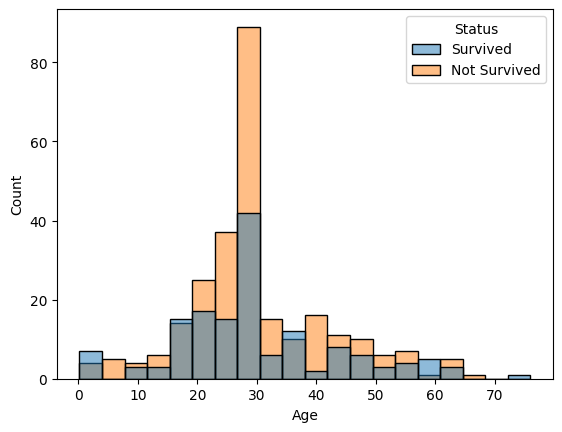

In [48]:
# Combine the data into a single DataFrame
df_survived = df[df['Survived'] == 1][['Age']]
df_survived['Status'] = 'Survived'

df_not_survived = df[df['Survived'] == 0][['Age']]
df_not_survived['Status'] = 'Not Survived'

df_combined = pd.concat([df_survived, df_not_survived])

# Plot the histogram with hue
sns.histplot(data=df_combined, x='Age', hue='Status', bins=20)

Аналізуючи надану гістограму про виживання пасажирів Титаніка за віковими категоріями, можна зробити декілька ключових висновків:

- Найбільша кількість пасажирів припадає на вікову категорію 20-30 років. У цій групі спостерігається значна різниця між тими, хто вижив, і тими, хто не вижив, з перевагою на користь тих, хто не вижив.
- Серед дітей та підлітків (до 20 років) спостерігається вища частка тих, хто вижив, порівняно з тими, хто не вижив. Це може свідчити про пріоритет у рятуванні дітей.
- У вікових категоріях від 30 до 50 років кількість тих, хто не вижив, переважає над тими, хто вижив, але різниця не така значна, як у групі 20-30 років.
- Серед пасажирів старше 50 років спостерігається відносно невелика кількість осіб, при цьому співвідношення між тими, хто вижив і не вижив, приблизно рівне.
- Найстарша вікова група (70+ років) має дуже малу кількість пасажирів, але серед них більше тих, хто вижив.

Загалом, гістограма демонструє, що вік був важливим фактором у виживанні під час катастрофи Титаніка. Діти та люди похилого віку, схоже, мали більші шанси на виживання, тоді як молоді дорослі (особливо у віці 20-30 років) становили найбільшу групу жертв.

In [50]:
# Clalculate survival rate per class per sex

for i in range(1, 4):
    for j in range(2):
        surv_rate = df[(df['Pclass'] == i) & (df['Sex'] == j) & (df['Survived'] == 1)].shape[0] / df[(df['Pclass'] == i) & (df['Sex'] == j)].shape[0]
        print(f'Share of survived {"male  " if j == 0 else "female"} passengers in class {i}: {surv_rate * 100:.2f}%')

Share of survived male   passengers in class 1: 0.00%
Share of survived female passengers in class 1: 100.00%
Share of survived male   passengers in class 2: 0.00%
Share of survived female passengers in class 2: 100.00%
Share of survived male   passengers in class 3: 0.00%
Share of survived female passengers in class 3: 100.00%


На цьому моменті можна запідозрити, що датасет бракований, оскільки кореляція між виживанням та статю 100%. Якщо вірити цьому дослідженю, то серед виживших були чоловіки і не всі жінки пережили трощю: https://www.shiftcomm.com/thinking/never-let-go-titanic-survival-101

In [51]:
df.corr()

,Survived,Pclass,Sex,Age,Fare,Fare_Category
Survived,1.000000,-0.108615,1.000000,0.008035,0.192036,0.189916
Pclass,-0.108615,1.000000,-0.108615,-0.467853,-0.577313,-0.753423
Sex,1.000000,-0.108615,1.000000,0.008035,0.192036,0.189916
Age,0.008035,-0.467853,0.008035,1.000000,0.342357,0.295036
Fare,0.192036,-0.577313,0.192036,0.342357,1.000000,0.630181
Fare_Category,0.189916,-0.753423,0.189916,0.295036,0.630181,1.000000


З матриці корреляції можна побачити, що найбільша кореляція виживання з статтю, але це не коректно. Отже виживання найбільше залежало від ціни на квиток.